In [0]:
from time import time
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [0]:
!pip install hdf5storage
import hdf5storage

     |████████████████████████████████| 61kB 2.3MB/s 


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
Data_Foldername = '/content/drive/My Drive/CSIC Project'#where is all the data kept

os.chdir(Data_Foldername)
#shuf_ind="%s/labels_y.pkl" % (Data_Foldername)   

In [0]:
with open('shuffle_index', 'rb') as f:
     shuffle_index=pickle.load(f)

s_ind=np.array(shuffle_index)
s_ind.shape



(1, 10000)

In [0]:
with open('labels_y', 'rb') as f:
     labels_y=pickle.load(f)
lab_y=np.array(labels_y)

label_y=lab_y[0,:,:]
label_y.shape

(10000, 1)

In [0]:
with open('PCA_MDS_ISOMAP', 'rb') as f:
     PCA_MDS_ISOMAP=pickle.load(f) 

PMI=np.array(PCA_MDS_ISOMAP)
PCA=PMI[0,:,:]
MDS=PMI[1,:,:]
ISOMAP=PMI[2,:,:]
PCA.shape

(10000, 2)

In [0]:
def plot_embedding(X, title=None):

    plt.scatter(X[:,0],X[:,1],c=label_y)
    plt.colorbar()

    if title is not None:
        plt.title(title)

In [0]:
#calculation for KNN
def KNN(X, kn):
 X_train, X_test, y_train, y_test = train_test_split(X, label_y, test_size=0.20, random_state = 42)
 from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler()
 scaler.fit(X_train)
 X_train = scaler.transform(X_train)
 X_test = scaler.transform(X_test)
 neigh = KNeighborsClassifier(n_neighbors=kn)
 neigh.fit(X_train, y_train)
 y_pred = neigh.predict(X_test)
 print(confusion_matrix(y_test, y_pred))
 print(classification_report(y_test, y_pred))

In [0]:
#calculation for SVM
def SVM(X, ker):
 X_train, X_test, y_train, y_test = train_test_split(X, label_y, test_size=0.20,random_state = 42)
 from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler()
 scaler.fit(X_train)
 X_train = scaler.transform(X_train)
 X_test = scaler.transform(X_test)
 from sklearn.svm import SVC
 svclassifier = SVC(kernel=ker)
 svclassifier.fit(X_train, y_train)
 y_pred =svclassifier.predict(X_test)
 print(confusion_matrix(y_test, y_pred))
 print(classification_report(y_test, y_pred))

In [0]:
#calculation for Decision Trees
def DT(X):
 X_train, X_test, y_train, y_test = train_test_split(X, label_y, test_size=0.20, random_state = 42)
#  from sklearn.preprocessing import StandardScaler
#  scaler = StandardScaler()
#  scaler.fit(X_train)
#  X_train = scaler.transform(X_train)
#  X_test = scaler.transform(X_test)
 from sklearn.tree import DecisionTreeClassifier
 classifier = DecisionTreeClassifier()
 classifier.fit(X_train, y_train)
 y_pred = classifier.predict(X_test)
 print(confusion_matrix(y_test, y_pred))
 print(classification_report(y_test, y_pred))

In [0]:
#calculation for Logistic Regression
def LR(X):
 X_train, X_test, y_train, y_test = train_test_split(X, label_y, test_size=0.20, random_state = 42)
 from sklearn.preprocessing import StandardScaler
 sc = StandardScaler()
 X_train = sc.fit_transform(X_train)
 X_test = sc.transform(X_test)
 from sklearn.linear_model import LogisticRegression
 clf = LogisticRegression(random_state=0).fit(X_train, y_train)
 y_pred = clf.predict(X_test)
 print(confusion_matrix(y_test, y_pred))
 print(classification_report(y_test, y_pred))

In [0]:
#calculation for Ridge Classifier
def Ridge(X):
 X_train, X_test, y_train, y_test = train_test_split(X, label_y, test_size=0.20, random_state = 42)
 from sklearn.preprocessing import StandardScaler
 sc = StandardScaler()
 X_train = sc.fit_transform(X_train)
 X_test = sc.transform(X_test)
 from sklearn.linear_model import RidgeClassifier
 clf = RidgeClassifier().fit(X_train, y_train)
 y_pred = clf.predict(X_test)
 print(confusion_matrix(y_test, y_pred))
 print(classification_report(y_test, y_pred))

In [0]:
KNN(MDS,5)

[[970  45]
 [ 48 937]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1015
           1       0.95      0.95      0.95       985

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


In [0]:
KNN(PCA,5)

[[902 113]
 [181 804]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1015
           1       0.88      0.82      0.85       985

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


In [0]:
KNN(PCA,10)

[[948  67]
 [205 780]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1015
           1       0.92      0.79      0.85       985

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


In [0]:
KNN(ISOMAP,5)

[[953  62]
 [ 92 893]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1015
           1       0.94      0.91      0.92       985

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


In [0]:
SVM(PCA)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[911 104]
 [275 710]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1015
           1       0.87      0.72      0.79       985

    accuracy                           0.81      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.82      0.81      0.81      2000



In [0]:
SVM(MDS)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[724 291]
 [319 666]]
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1015
           1       0.70      0.68      0.69       985

    accuracy                           0.69      2000
   macro avg       0.70      0.69      0.69      2000
weighted avg       0.70      0.69      0.69      2000



In [0]:
SVM(ISOMAP)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[733 282]
 [230 755]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1015
           1       0.73      0.77      0.75       985

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000



In [0]:
SVM(PCA) #rbf kernel

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[973  42]
 [241 744]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1015
           1       0.95      0.76      0.84       985

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



In [0]:
SVM(MDS) #rbf kernel

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[983  32]
 [ 85 900]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1015
           1       0.97      0.91      0.94       985

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



In [0]:
SVM(ISOMAP) #rbf kernel

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[967  48]
 [120 865]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1015
           1       0.95      0.88      0.91       985

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [0]:
SVM(PCA) #poly kernel

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[671 344]
 [121 864]]
              precision    recall  f1-score   support

           0       0.85      0.66      0.74      1015
           1       0.72      0.88      0.79       985

    accuracy                           0.77      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.78      0.77      0.76      2000



In [0]:
SVM(MDS) #poly kernel

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[951  64]
 [595 390]]
              precision    recall  f1-score   support

           0       0.62      0.94      0.74      1015
           1       0.86      0.40      0.54       985

    accuracy                           0.67      2000
   macro avg       0.74      0.67      0.64      2000
weighted avg       0.74      0.67      0.64      2000



In [0]:
SVM(ISOMAP) #poly kernel

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[937  78]
 [402 583]]
              precision    recall  f1-score   support

           0       0.70      0.92      0.80      1015
           1       0.88      0.59      0.71       985

    accuracy                           0.76      2000
   macro avg       0.79      0.76      0.75      2000
weighted avg       0.79      0.76      0.75      2000



In [0]:
with open('tSNE_sklearn', 'rb') as f:
     TSNE=pickle.load(f) 



In [0]:
TSNE=np.array(TSNE)
TSNE.shape

(1, 10000, 2)

In [0]:
TSNE=np.reshape(TSNE,(TSNE.shape[1],TSNE.shape[2]))
TSNE.shape

(10000, 2)

In [0]:
with open('X_tsne_p30', 'rb') as f:
     TSNE1=pickle.load(f) 
TSNE1=np.array(TSNE1)
TSNE1=np.reshape(TSNE1,(TSNE1.shape[1],TSNE1.shape[2]))
TSNE1.shape

(10000, 2)

In [0]:
KNN(TSNE,5)

[[881 134]
 [191 794]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1015
           1       0.86      0.81      0.83       985

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


In [0]:
SVM(TSNE,'linear')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[901 114]
 [280 705]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1015
           1       0.86      0.72      0.78       985

    accuracy                           0.80      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       0.81      0.80      0.80      2000



In [0]:
SVM(TSNE,'rbf')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[974  41]
 [250 735]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1015
           1       0.95      0.75      0.83       985

    accuracy                           0.85      2000
   macro avg       0.87      0.85      0.85      2000
weighted avg       0.87      0.85      0.85      2000



In [0]:
SVM(TSNE,'poly')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[678 337]
 [129 856]]
              precision    recall  f1-score   support

           0       0.84      0.67      0.74      1015
           1       0.72      0.87      0.79       985

    accuracy                           0.77      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.78      0.77      0.76      2000



In [0]:
with open('X_tsne_p30', 'rb') as f:
     TSNE1=pickle.load(f) 
TSNE1=np.array(TSNE1)
TSNE1=np.reshape(TSNE1,(TSNE1.shape[1],TSNE1.shape[2]))
TSNE1.shape

(10000, 2)

In [0]:
KNN(TSNE1,5)

[[859 156]
 [211 774]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1015
           1       0.83      0.79      0.81       985

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


In [0]:
SVM(TSNE1,'linear')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[653 362]
 [225 760]]
              precision    recall  f1-score   support

           0       0.74      0.64      0.69      1015
           1       0.68      0.77      0.72       985

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000



In [0]:
SVM(TSNE1,'rbf')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[836 179]
 [200 785]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1015
           1       0.81      0.80      0.81       985

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



In [0]:
SVM(TSNE1,'poly')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[503 512]
 [ 87 898]]
              precision    recall  f1-score   support

           0       0.85      0.50      0.63      1015
           1       0.64      0.91      0.75       985

    accuracy                           0.70      2000
   macro avg       0.74      0.70      0.69      2000
weighted avg       0.75      0.70      0.69      2000



In [0]:
DT(PCA)

[[831 184]
 [194 791]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1015
           1       0.81      0.80      0.81       985

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



In [0]:
DT(MDS)

[[945  70]
 [ 66 919]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1015
           1       0.93      0.93      0.93       985

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [0]:
DT(ISOMAP)

[[921  94]
 [ 93 892]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1015
           1       0.90      0.91      0.91       985

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



In [0]:
DT(TSNE)

[[800 215]
 [184 801]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1015
           1       0.79      0.81      0.80       985

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



In [0]:
DT(TSNE1)

[[813 202]
 [205 780]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1015
           1       0.79      0.79      0.79       985

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



In [0]:
LR(PCA)

[[857 158]
 [242 743]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1015
           1       0.82      0.75      0.79       985

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
LR_robust(TSNE)

[[853 162]
 [242 743]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1015
           1       0.82      0.75      0.79       985

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
LR(ISOMAP)

[[692 323]
 [209 776]]
              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1015
           1       0.71      0.79      0.74       985

    accuracy                           0.73      2000
   macro avg       0.74      0.73      0.73      2000
weighted avg       0.74      0.73      0.73      2000



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
LR(TSNE)

[[853 162]
 [242 743]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1015
           1       0.82      0.75      0.79       985

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
LR(TSNE1)

[[695 320]
 [264 721]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70      1015
           1       0.69      0.73      0.71       985

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
Ridge(PCA)

[[877 138]
 [280 705]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1015
           1       0.84      0.72      0.77       985

    accuracy                           0.79      2000
   macro avg       0.80      0.79      0.79      2000
weighted avg       0.80      0.79      0.79      2000



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:940: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
Ridge(MDS)

[[725 290]
 [320 665]]
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1015
           1       0.70      0.68      0.69       985

    accuracy                           0.69      2000
   macro avg       0.70      0.69      0.69      2000
weighted avg       0.70      0.69      0.69      2000



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:940: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
Ridge(ISOMAP)

[[663 352]
 [194 791]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.71      1015
           1       0.69      0.80      0.74       985

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:940: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
Ridge(TSNE)

[[867 148]
 [284 701]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1015
           1       0.83      0.71      0.76       985

    accuracy                           0.78      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.79      0.78      0.78      2000



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:940: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
Data_X="%s/YTSNE.mat" % (Data_Foldername)
TSNE3 =   X=hdf5storage.loadmat(Data_X) 
TSNE3D=TSNE3['Y']
TSNE3D.shape

(10000, 3)

In [0]:
KNN(TSNE3D,5)

[[505 510]
 [492 493]]
              precision    recall  f1-score   support

           0       0.51      0.50      0.50      1015
           1       0.49      0.50      0.50       985

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


In [0]:
Ridge(TSNE3D)

[[503 512]
 [443 542]]
              precision    recall  f1-score   support

           0       0.53      0.50      0.51      1015
           1       0.51      0.55      0.53       985

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.52      0.52      0.52      2000



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:940: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
LR(TSNE3D)

[[503 512]
 [443 542]]
              precision    recall  f1-score   support

           0       0.53      0.50      0.51      1015
           1       0.51      0.55      0.53       985

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.52      0.52      0.52      2000



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
LR_robust(TSNE)

NameError: ignored

In [0]:
SVM(TSNE3D,'poly')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[355 660]
 [324 661]]
              precision    recall  f1-score   support

           0       0.52      0.35      0.42      1015
           1       0.50      0.67      0.57       985

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.51      0.51      0.50      2000



In [0]:
SVM(TSNE3D,'linear')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[582 433]
 [512 473]]
              precision    recall  f1-score   support

           0       0.53      0.57      0.55      1015
           1       0.52      0.48      0.50       985

    accuracy                           0.53      2000
   macro avg       0.53      0.53      0.53      2000
weighted avg       0.53      0.53      0.53      2000



In [0]:
SVM(TSNE3D,'rbf')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[459 556]
 [427 558]]
              precision    recall  f1-score   support

           0       0.52      0.45      0.48      1015
           1       0.50      0.57      0.53       985

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



In [0]:
with open('X_ltsa', 'rb') as f:
     X_ltsa=pickle.load(f) 
X_ltsa=np.array(X_ltsa)
X_ltsa=np.reshape(X_ltsa,(X_ltsa.shape[1],X_ltsa.shape[2]))
X_ltsa.shape

(10000, 2)

In [0]:
KNN(X_ltsa,5)

[[492 523]
 [509 476]]
              precision    recall  f1-score   support

           0       0.49      0.48      0.49      1015
           1       0.48      0.48      0.48       985

    accuracy                           0.48      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.48      0.48      0.48      2000



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


In [0]:
DT(X_ltsa)

NameError: ignored

In [0]:
LR(X_ltsa)

[[ 26 989]
 [ 14 971]]
              precision    recall  f1-score   support

           0       0.65      0.03      0.05      1015
           1       0.50      0.99      0.66       985

    accuracy                           0.50      2000
   macro avg       0.57      0.51      0.35      2000
weighted avg       0.57      0.50      0.35      2000



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
Ridge(X_ltsa)

[[ 21 994]
 [ 14 971]]
              precision    recall  f1-score   support

           0       0.60      0.02      0.04      1015
           1       0.49      0.99      0.66       985

    accuracy                           0.50      2000
   macro avg       0.55      0.50      0.35      2000
weighted avg       0.55      0.50      0.34      2000



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:940: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
SVM(X_ltsa,'linear')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[   0 1015]
 [   3  982]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1015
           1       0.49      1.00      0.66       985

    accuracy                           0.49      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.24      0.49      0.32      2000



In [0]:
SVM(X_ltsa,'rbf')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 40 975]
 [ 21 964]]
              precision    recall  f1-score   support

           0       0.66      0.04      0.07      1015
           1       0.50      0.98      0.66       985

    accuracy                           0.50      2000
   macro avg       0.58      0.51      0.37      2000
weighted avg       0.58      0.50      0.36      2000



In [0]:
SVM(X_ltsa,'poly')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[   0 1015]
 [   1  984]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1015
           1       0.49      1.00      0.66       985

    accuracy                           0.49      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.24      0.49      0.32      2000



In [0]:
with open('X_DNenco', 'rb') as f:
     X_DNenco=pickle.load(f) 
X_DNenco=np.array(X_DNenco)
X_DNenco=np.reshape(X_ltsa,(X_DNenco.shape[1],X_DNenco.shape[2]))
X_DNenco.shape

(10000, 2)

In [0]:
KNN(X_DNenco,5)

[[492 523]
 [509 476]]
              precision    recall  f1-score   support

           0       0.49      0.48      0.49      1015
           1       0.48      0.48      0.48       985

    accuracy                           0.48      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.48      0.48      0.48      2000



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [0]:
DT(X_DNenco)

[[895 120]
 [851 134]]
              precision    recall  f1-score   support

           0       0.51      0.88      0.65      1015
           1       0.53      0.14      0.22       985

    accuracy                           0.51      2000
   macro avg       0.52      0.51      0.43      2000
weighted avg       0.52      0.51      0.44      2000



In [0]:
LR(X_DNenco)

[[  15 1000]
 [  11  974]]
              precision    recall  f1-score   support

           0       0.58      0.01      0.03      1015
           1       0.49      0.99      0.66       985

    accuracy                           0.49      2000
   macro avg       0.54      0.50      0.34      2000
weighted avg       0.54      0.49      0.34      2000



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
Ridge(X_DNenco)

[[  13 1002]
 [  10  975]]
              precision    recall  f1-score   support

           0       0.57      0.01      0.03      1015
           1       0.49      0.99      0.66       985

    accuracy                           0.49      2000
   macro avg       0.53      0.50      0.34      2000
weighted avg       0.53      0.49      0.34      2000



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:940: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
SVM(X_DNenco,'linear')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[   0 1015]
 [   0  985]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1015
           1       0.49      1.00      0.66       985

    accuracy                           0.49      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.24      0.49      0.33      2000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
SVM(X_DNenco,'rbf')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[   5 1010]
 [   2  983]]
              precision    recall  f1-score   support

           0       0.71      0.00      0.01      1015
           1       0.49      1.00      0.66       985

    accuracy                           0.49      2000
   macro avg       0.60      0.50      0.33      2000
weighted avg       0.61      0.49      0.33      2000



In [0]:
SVM(X_DNenco,'poly')


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[   0 1015]
 [   0  985]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1015
           1       0.49      1.00      0.66       985

    accuracy                           0.49      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.24      0.49      0.33      2000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
#calculation for DNN
def DNN(X,Niter):
 X_train, X_test, y_train, y_test = train_test_split(X, label_y, test_size=0.20,random_state = 42)
 from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler()
 scaler.fit(X_train)
 X_train = scaler.transform(X_train)
 X_test = scaler.transform(X_test)
 import tensorflow as tf
 import tensorflow_addons as tfa
 from tensorflow import keras 

 model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(2)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
 ])
 model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
 model.fit(X_train, y_train, epochs=Niter)
 test_loss, test_acc = model.evaluate(X_test, y_test) 
 print('Test Accuracy:', test_acc)
 y_pred =model.predict(X_test)
 y_pred1=(y_pred>0.5)
 print(confusion_matrix(y_test, y_pred1))
 print(classification_report(y_test, y_pred1))

In [0]:
DNN(MDS,50)

Epoch 1/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2406 - accuracy: 0.9055
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1546 - accuracy: 0.9359
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1461 - accuracy: 0.9409
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1371 - accuracy: 0.9444
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1393 - accuracy: 0.9448
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1368 - accuracy: 0.9471
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1351 - accuracy: 0.9464
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1334 - accuracy: 0.9473
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1302 - accuracy: 0.9480
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1320 - accuracy: 0.9486

In [0]:
DNN(PCA,50)

Epoch 1/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8244
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8529
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3250 - accuracy: 0.8535
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.8616
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8566
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3220 - accuracy: 0.8600
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.8565
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3210 - accuracy: 0.8580
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.8559
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.8559

In [0]:
DNN(ISOMAP,50)

Epoch 1/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3552 - accuracy: 0.8454
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 0.9000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2377 - accuracy: 0.9080
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2397 - accuracy: 0.9094
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2313 - accuracy: 0.9125
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.9141
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.9162
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2135 - accuracy: 0.9184
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2105 - accuracy: 0.9202
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.9193

In [0]:
DNN(TSNE,50)

Epoch 1/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.8291
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8497
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3284 - accuracy: 0.8543
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8569
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8554
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8551
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.8547
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8558
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3251 - accuracy: 0.8553
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3246 - accuracy: 0.8575

In [0]:
DNN(TSNE1,50)

Epoch 1/50
250/250 [==============================] - 0s 2ms/step - loss: 0.5505 - accuracy: 0.7360
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.7830
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.7949
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8026
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8060
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.8104
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.8134
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8134
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8135
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3948 - accuracy: 0.8126

In [0]:
DNN(TSNE3D,50)

Epoch 1/50


ValueError: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Attempting to set identical left == right == -1.6989950353291654 results in singular transformations; automatically expanding.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Attempting to set identical bottom == top == -1.7004963867914238 results in singular transformations; automatically expanding.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: U

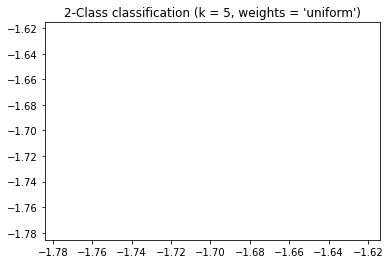

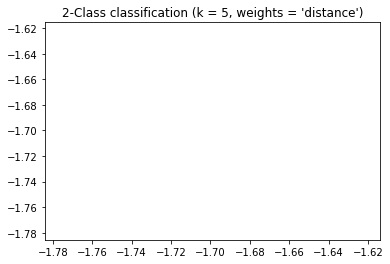

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors=5
h =100
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
X=X_ltsa
y=label_y
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()